# **WELCOME TO SURGE SAVYY**

IMPORTING REQUIRED LIBRARIES


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define a function to generate synthetic damage cost based on surge height using a polynomial relationship

In [18]:
def generate_damage_cost(surge_height):
    # Define a linear relationship between surge height and damage cost
    # Adjust coefficients based on the expected impact of surge height on damage cost
    # This is a simplistic example, and you may need to refine it based on actual data
    return (100000 * surge_height) ** 2   # Adjust the coefficient as needed


In [7]:

# Load the dataset
data_surge = pd.read_csv("surge.csv")


In [8]:

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data_surge.head())


Dataset Preview:
   time hours since 1900-01-01 00:00:00.0  u10 m s**-1  v10 m s**-1  \
0                                  973008     9.304976     0.647637   
1                                  973008    11.284721     0.234706   
2                                  973008     9.304976     1.105641   
3                                  973008     7.498699     1.067838   
4                                  973008     7.834623     0.971875   

          msl Pa  Distance Weight   surge m  
0  101466.523656         1.000000  0.040876  
1  101549.947853         0.925527  0.040876  
2  101377.553920         0.668373  0.040876  
3  101748.381707         0.654728  0.040876  
4  101808.900417         0.624854  0.040876  


In [9]:

# Basic statistics of the dataset
print("\nDataset Statistics:")
print(data_surge.describe())



Dataset Statistics:
       time hours since 1900-01-01 00:00:00.0    u10 m s**-1    v10 m s**-1  \
count                            1.168800e+05  116880.000000  116880.000000   
mean                             9.905370e+05       1.479688       1.027725   
std                              1.012215e+04       4.718626       3.820995   
min                              9.730080e+05     -17.505565     -18.425689   
25%                              9.817725e+05      -1.835565      -1.549329   
50%                              9.905370e+05       1.756337       1.044574   
75%                              9.993015e+05       4.781024       3.474177   
max                              1.008066e+06      22.854804      20.021937   

              msl Pa  Distance Weight        surge m  
count  116880.000000    116880.000000  116880.000000  
mean   101451.866065         0.387576       0.004957  
std       937.044939         0.281106       0.340051  
min     96727.016626         0.000000      -1.2

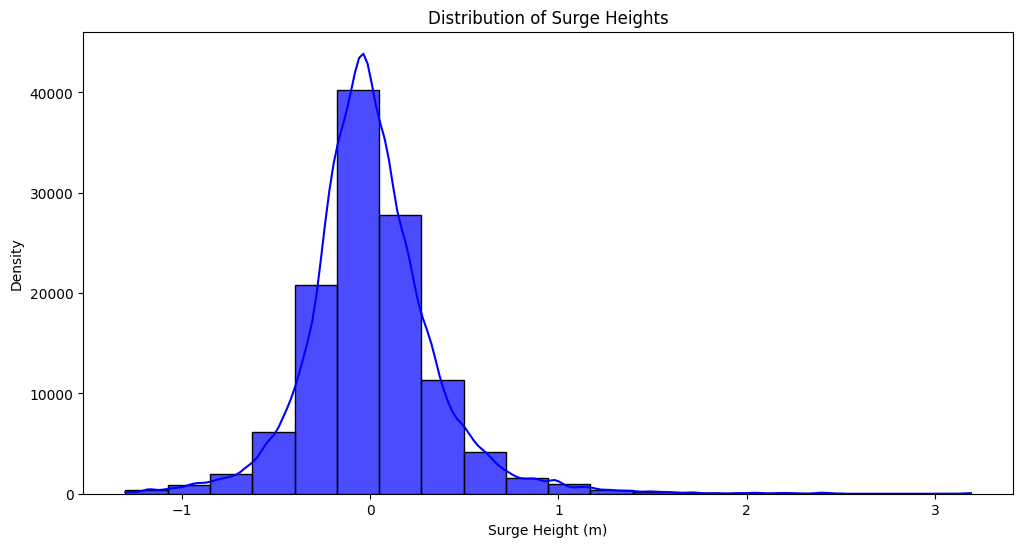

In [10]:

# Visualize the distribution of surge heights
plt.figure(figsize=(12, 6))
sns.histplot(data=data_surge, x='surge m', bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Surge Heights')
plt.xlabel('Surge Height (m)')
plt.ylabel('Density')
plt.show()


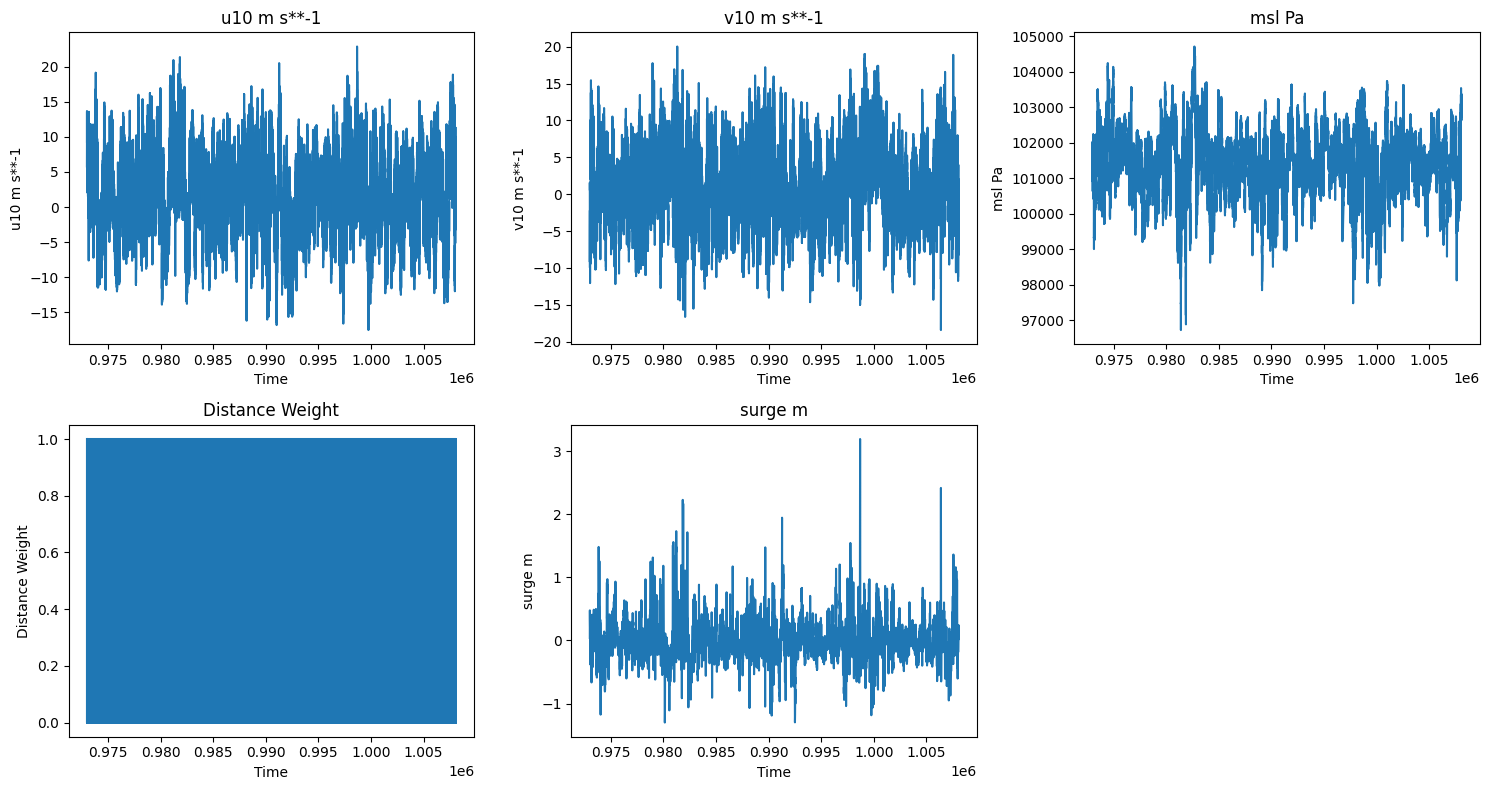

In [11]:

# Plot the data
plt.figure(figsize=(15, 8))
for i, col in enumerate(data_surge.columns[1:], 1):
    plt.subplot(2, 3, i)
    plt.plot(data_surge['time hours since 1900-01-01 00:00:00.0'], data_surge[col])
    plt.title(col)
    plt.xlabel('Time')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



In [12]:
# Feature selection for surge prediction
X_surge = data_surge[['u10 m s**-1', 'v10 m s**-1', 'msl Pa', 'Distance Weight']]
y_surge = data_surge['surge m']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_surge, y_surge, test_size=0.2, random_state=42)

# Train the surge prediction model (linear regression)
surge_model = LinearRegression()
surge_model.fit(X_train, y_train)

# Make predictions on the testing set
surge_predictions = surge_model.predict(X_test)

# Evaluate the model
surge_mse = mean_squared_error(y_test, surge_predictions)
print("Surge Prediction MSE:", surge_mse)


Surge Prediction MSE: 0.06100711426569655


# **SURGE PREDICTION MSE**

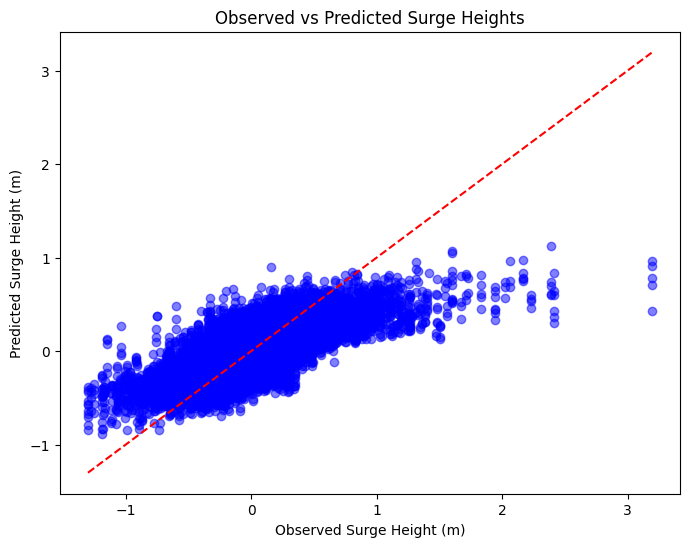

In [13]:

# Observed vs predicted storm heights plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, surge_predictions, color='blue', alpha=0.5)
plt.title('Observed vs Predicted Surge Heights')
plt.xlabel('Observed Surge Height (m)')
plt.ylabel('Predicted Surge Height (m)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()



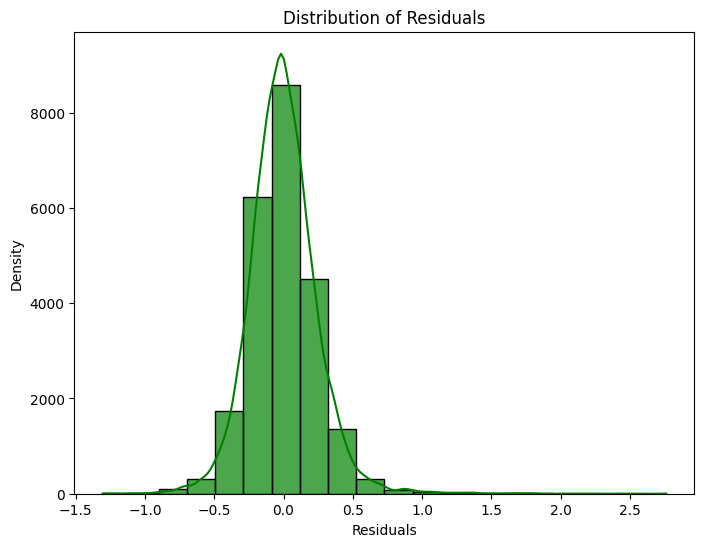

In [14]:
# Residual plot: visualize the distribution of residuals
residuals = y_test - surge_predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()



In [15]:
# Finally, print the prediction
print("Predicted Surge Heights:")
print(surge_predictions)


Predicted Surge Heights:
[-0.2951369   0.13991664  0.28541704 ...  0.41368921 -0.15475608
 -0.28829741]


In [20]:

# Generate synthetic damage costs based on surge heights
damage_costs = [generate_damage_cost(height) for height in surge_predictions]

# Split the data into training and testing sets for damage cost prediction
X_train_damage, X_test_damage, y_train_damage, y_test_damage = train_test_split(surge_predictions.reshape(-1, 1), damage_costs, test_size=0.2, random_state=42)

# Train the damage cost prediction model (linear regression)
damage_model = LinearRegression()
damage_model.fit(X_train_damage, y_train_damage)

# Make predictions on the testing set for damage cost prediction
damage_predictions = damage_model.predict(X_test_damage)

# Evaluate the damage cost prediction model
damage_mse = mean_squared_error(y_test_damage, damage_predictions)
print("Damage Cost Prediction MSE:", damage_mse)


Damage Cost Prediction MSE: 6.053544152071181e+17


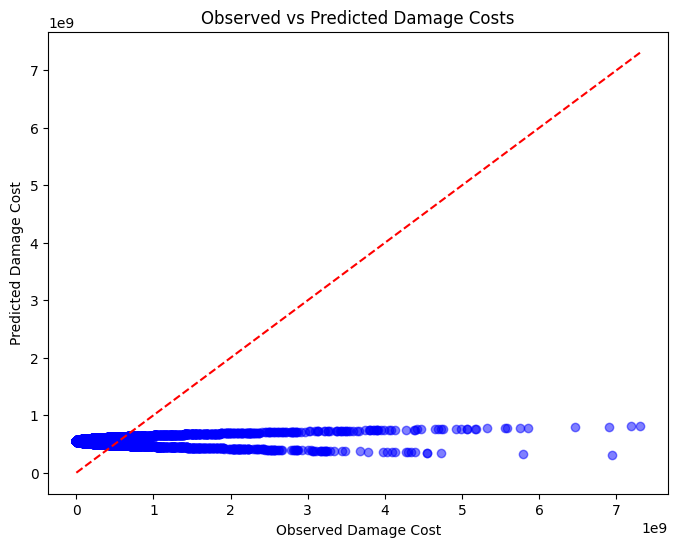

Predicted Damage Costs:
[6.00274837e+08 5.73196671e+08 4.85688895e+08 ... 6.12601558e+08
 4.57406412e+08 6.83110227e+08]


In [21]:

# Observed vs predicted damage costs plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_damage, damage_predictions, color='blue', alpha=0.5)
plt.title('Observed vs Predicted Damage Costs')
plt.xlabel('Observed Damage Cost')
plt.ylabel('Predicted Damage Cost')
plt.plot([min(y_test_damage), max(y_test_damage)], [min(y_test_damage), max(y_test_damage)], linestyle='--', color='red')
plt.show()

# Finally, print the prediction
print("Predicted Damage Costs:")
print(damage_predictions)